In [67]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from mecab import MeCab
from pymongo import MongoClient
import pandas as pd 

# ÎÑ§Ìä∏ÏõåÌÅ¨ Ïó∞Í≤∞ Í∑úÏπô : protocol://ip:port/path 
client = MongoClient('mongodb://192.168.0.50:27017/')

db_name = client["DB_SGMN"]
collection = db_name["COL_SCRAPPING_TOSS_COMMENT_HISTORY"]


In [68]:
find_data = collection.find()
data_list = list(find_data)

In [69]:
df_data = pd.DataFrame(data_list)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251836 entries, 0 to 251835
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   _id         251836 non-null  object        
 1   COMMENT     251836 non-null  object        
 2   CREATED_AT  251836 non-null  datetime64[ns]
 3   DATE        251836 non-null  object        
 4   DATETIME    251836 non-null  object        
 5   SYMBOL      251836 non-null  object        
 6   UPDATED_AT  251836 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 13.4+ MB


In [85]:
df_data[:50000].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   _id         50000 non-null  object        
 1   COMMENT     50000 non-null  object        
 2   CREATED_AT  50000 non-null  datetime64[ns]
 3   DATE        50000 non-null  object        
 4   DATETIME    50000 non-null  object        
 5   SYMBOL      50000 non-null  object        
 6   UPDATED_AT  50000 non-null  object        
 7   WEEK        50000 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 3.1+ MB


In [86]:
# df_data[:50000].to_csv('output.csv', index=False)  # index=FalseÎ°ú Ïù∏Îç±Ïä§ Ïó¥ Ï†úÏô∏

In [70]:
mecab_inst = MeCab()

In [71]:
# Ï£ºÏ∞® Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú Ìï®Ïàò Ï†ïÏùò
def get_week(date_str):
    # Ï†ïÍ∑ú ÌëúÌòÑÏãùÏúºÎ°ú Ïó∞ÎèÑÏôÄ Ïõî, ÏùºÏùÑ Ï∂îÏ∂ú
    match = re.match(r'(\d{4})-(\d{2})-(\d{2})', date_str)
    if match:
        year, month, day = map(int, match.groups())
        # ÎÇ†Ïßú Í∞ùÏ≤¥ ÏÉùÏÑ±
        date = pd.Timestamp(year=year, month=month, day=day)
        # ISO Ï£ºÏ∞® Î∞òÌôò
        return date.isocalendar()[1]  # Ï£ºÏ∞®
    return None


In [72]:
# DATE Ïó¥ÏóêÏÑú Ï£ºÏ∞® Í≥ÑÏÇ∞
df_data['WEEK'] = df_data['DATE'].apply(get_week)

# Ï£ºÏ∞®Î≥ÑÎ°ú Í∑∏Î£πÌôîÌïòÏó¨ ÏßëÍ≥Ñ (Ïòà: VALUEÏùò Ìï©Í≥Ñ)
weekly_data = df_data.groupby(['WEEK']).agg({'COMMENT': ' '.join}).reset_index()

# Í≤∞Í≥º Ï∂úÎ†•
print(weekly_data)

   WEEK                                            COMMENT
0    47  Î®∏ÏÑ†ÏùºÏù¥Ïïº Î≠êÎÉê ÎÑà..Ïôú Ìù¨Îßù Í∞ñÍ≤åÌïòÎÉê Î™áÍ∞úÏõî Í∏∞Îã§Î¶¨Îã§Í∞Ä Ï°∞Í∏à Ïò¨ÎùºÏÑú Î∫èÎçîÎãà Ïûò Ïò¨...
1    49  Í≥ÑÏóÑ Ïã§Ìå® ÎÑàÎ¨¥ ÏïÑÏâ¨Ïö¥ ÏÇ¨Îûå Í∞úÏ∂î üëçüëçüëç 2024-12-04\n\nÏïàÎÖïÌïòÏÑ∏Ïöî Ï°¥Î≤ÑÍøÄ...
2    50  ÏπòÎß§ÏπòÎ£åÏïΩ Î¨∏Ïó¥Ïñ¥Ï£ºÏÑ∏Ïöî ÌòÑÍ∏∞Ï¶ùÎÇúÎã®ÎßêÏù¥ÏóêÏöî Ìïò.. 14Ìçº Ïò¨ÎûêÎäîÎç∞ 3ÎßåÏõêÎ∞ñÏóê Ïïà ÎÑ£Ïñ¥...
3    51  ÌÖåÏä¨Îùº Ìù•ÌñâÌïòÎ©¥ Íº≠ ÏûêÎπ†ÏßÄÎÑ§ Î∏åÎ°†Ï¶à Î±ÉÏßÄ„Ö£Îã® Îì£Î≥¥Îì§Ïù¥ Ï∞®Ìä∏Î∂ÑÏÑùÏùÑÏò¨Î¶∞Îã§?\nÍ∞ïÎ†•Ìïú Îß§...
4    52  Ïò§Îäò ÏßÑÏßú Í∂ÅÍ∏àÌïòÎÑ§ „Öã„Öã Ï†úÍ∞Ä Ïò¨Ìï¥ Ï¥ù 600 ÏàòÏùµÏùÑ ÎÉàÍ≥†\nÏßÄÍ∏à -330Ïù∏Îç∞ ÌåîÏïÑ...


Counter({'Ïï†Ìîå': 34, 'Ï£ºÏ£º': 15, 'Ï£ºÏãù': 15, 'ÏïÑÏ≤ò': 14, 'ÌöåÏÇ¨': 13, 'Îß§Ïàò': 11, 'Îã¨Îü¨': 10, 'Îß§ÎèÑ': 10, 'ÏßÑÏûÖ': 8, 'ÏàòÏùµ': 8, 'Ï∂îÎß§': 7, 'Ï°∞ÎπÑ': 7, 'ÏãúÎ¶¨': 6, 'Ï¢ÖÎ™©': 6, 'Ï£ºÍ∞Ä': 6, 'ÌîÑÎ°ú': 6, 'ÏÜåÏÜ°': 6, 'Ï°∞Ìï≠': 6, 'ÎπÑÏ§ë': 5, 'ÏÉùÍ∞Å': 5, 'ÎÇ¥ÎÖÑ': 5, 'Ï†ÄÏ†ê': 5, 'ÌèâÎã®': 5, 'Í≥µÎß§ÎèÑ': 5, 'Ï†úÍ∏∞': 5, 'Ï∂úÏãú': 4, 'Í≥µÍ∞ú': 4, 'Í∏∞Îä•': 4, 'Ï†ïÎ≥¥': 4, 'ÏÇ¨Í≥º': 4, 'Ïò§Îäò': 4, 'ÏïàÎÖï': 4, 'ÌèâÍ∞Ä': 4, 'Ìà¨ÏûêÏûê': 4, 'Ìà¨Ïûê': 4, 'Ï±ÖÏûÑ': 4, 'Í∏ÄÎ°úÎ≤å': 4, 'Ï§ëÍµ≠': 4, 'Ï†ïÎèÑ': 4, 'Ïó¨Í∏∞': 4, 'Î∂ÑÌï†': 4, 'Î≤ïÏ†ï': 4, 'ÎπÑÌñâ': 4, 'Î∞úÌëú': 4, 'ÏÉÅÏö©': 4, 'Ï£ºÏöî': 3, 'Í∞úÎ∞ú': 3, 'ÏßÑÌñâ': 3, 'ÏòàÏ†ï': 3, 'ÏöîÏïΩ': 3, 'Îã®Í≥Ñ': 3, 'Í∞úÏù∏': 3, 'Ï†ÑÎûµ': 3, 'Ïã§ÌòÑ': 3, 'ÏÑ∏Í∏à': 3, 'Î≤àÏä§ÌÉÄÏù∏': 3, 'Í∞ÄÎä•': 3, 'ÏûêÎ¶øÏàò': 3, 'Îß§Ï∂ú': 3, 'ÏÑ±Ïû•': 3, 'Í∞úÏÑ†': 3, 'Ï∂îÍ∞Ä': 3, 'ÏûêÏÇ∞': 3, 'Í¥ÄÎ†®': 3, 'Î¨¥ÏÑ†': 3, 'ÏòàÏÉÅ': 3, 'Ïù¥Í±∞': 3, 'ÏûêÎ¶¨': 3, 'Íµ¨Îß§': 3, 'ÏãúÏûë': 3, 'ÌÄÄÌÖÄ': 3, 'Ïª¥Ìì®ÌåÖ': 3, 'Í∞êÏÜå': 3, 'ÌåêÎß§': 3, 

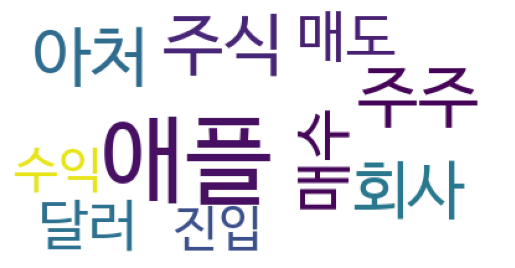

Counter({'ÏóîÎπÑÎîîÏïÑ': 255, 'Ïï†Ìîå': 67, 'Ï£ºÏãù': 65, 'Îã¨Îü¨': 63, 'ÏãúÏû•': 58, 'ÏòàÏÉÅ': 48, 'Ïò§Îäò': 48, 'ÎØ∏Íµ≠': 47, 'ÏÉÅÏäπ': 44, 'Ìà¨Ïûê': 44, 'Îß§Ïàò': 40, 'Î∞òÎèÑÏ≤¥': 37, 'ÌôòÏú®': 35, 'ÏàòÏùµ': 35, 'Î∞úÌëú': 34, 'ÌÖåÏä¨Îùº': 34, 'ÏÉùÍ∞Å': 31, 'Í≥ÑÏóÑ': 30, 'Í∏∞Ïà†': 30, 'Í∞ÄÏ¶à': 29, 'Ï°∞Ï†ï': 27, 'Í∏∞ÏóÖ': 27, 'Íµ≠Ïû•': 27, 'ÏßÄÏàò': 26, 'ÌèâÎã®': 25, 'Í≥ÑÏóÑÎ†π': 23, 'Ïù¥Ï†Ñ': 23, 'ÎÇ¥ÎÖÑ': 22, 'Ï†úÏ°∞ÏóÖ': 22, 'ÌïòÎÇò': 22, 'Í∞ÄÎä•': 21, 'ÏãúÍ∞Ñ': 21, 'Ï£ºÍ∞Ä': 21, 'ÌïòÎùΩ': 21, 'ÎØ∏Ïû•': 20, 'Î™®Ïäµ': 20, 'ÎïåÎ¨∏': 20, 'Íµ¨Îß§': 20, 'Ïã§Ï†Å': 20, 'Í∞ÄÍ≤©': 20, 'ÎåÄÌïúÎØºÍµ≠': 19, 'Ï¢ÖÎ™©': 19, 'ÏàòÏöî': 18, 'Î©îÌÉÄ': 18, 'Í∏ÄÎ°úÎ≤å': 18, 'Í≥†Ï†ê': 18, 'ÏΩîÏù∏': 18, 'ÌïúÍµ≠': 17, 'ÏòàÏ†ï': 17, 'Ìö°Î≥¥': 17, 'Ï†ïÎèÑ': 17, 'Ïù¥Í±∞': 17, 'Ïù¥ÏÉÅ': 17, 'ÎßàÏÜå': 17, 'ÏÇ¨Îûå': 16, 'ÎßàÍ∞ê': 16, 'Î∏îÎûôÏõ∞': 16, 'Îã§Ïùå': 16, 'Ï£ºÎ¨∏': 16, 'Ï§ëÍµ≠': 16, 'ÏãúÏûë': 15, 'ÏßÄÍ∏à': 15, 'Î∂ÑÍ∏∞': 15, 'ÏòÅÌñ•': 15, 'Îß§ÎèÑ': 15, 'Ïù¥Ïú†': 15, 'ÌôòÏ†Ñ': 15, 'Í∏àÎ¶¨': 14, 'Ï£ºÏöî'

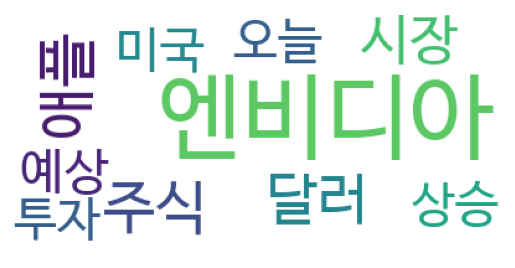

Counter({'ÌÖåÏä¨Îùº': 157, 'ÏóîÎπÑÎîîÏïÑ': 142, 'Ï°∞Ï†ï': 88, 'Ï£ºÏãù': 70, 'Ï∂îÎß§': 69, 'Îã¨Îü¨': 60, 'Îß§Ïàò': 56, 'ÏàòÏùµ': 52, 'Ï§ëÍµ≠': 49, 'ÏÉùÍ∞Å': 48, 'Ïò§Îäò': 45, 'Í≥†Ï†ê': 40, 'ÏÉÅÏäπ': 35, 'ÎØ∏Íµ≠': 33, 'ÌïòÎùΩ': 31, 'ÏÇ¨Îûå': 31, 'ÌîÑÎ°ú': 30, 'Ïù¥Î≤à': 30, 'Ï†ïÎèÑ': 30, 'ÏãúÏûë': 29, 'Îß§ÎèÑ': 29, 'ÏßÑÏûÖ': 29, 'Î∞òÎèÖÏ†ê': 27, 'Í∞ÄÏ¶à': 25, 'Í∏∞ÏóÖ': 25, 'Ìà¨Ïûê': 25, 'Ï£ºÍ∞Ä': 24, 'Ìö°Î≥¥': 24, 'ÌïòÎÇò': 23, 'ÏòàÏÉÅ': 22, 'Ïñ¥Îîî': 22, 'ÏãúÏû•': 21, 'Ïù¥Í±∞': 21, 'Î™®Îç∏': 21, 'Ï†ÄÏ†ê': 19, 'ÏïÑÎßàÏ°¥': 19, 'Í∏∞Ìöå': 19, 'Îã§Ïùå': 18, 'Ïã§Ï†Å': 18, 'ÎïåÎ¨∏': 18, 'Ï°∞ÏÇ¨': 18, 'ÏãúÍ∞Ñ': 17, 'Í∞ÄÎä•': 17, 'Ï¢ÖÎ™©': 16, 'Ìò∏Ïû¨': 16, 'Ïã§ÌòÑ': 15, 'Î∂ÑÌï†': 15, 'ÏÇ∞ÌÉÄÎû†Î¶¨': 15, 'ÎèåÌåå': 15, 'ÌÉÄÏù¥Î∞ç': 14, 'Ìä∏ÎüºÌîÑ': 14, 'Ïù¥Ïú†': 14, 'ÌôòÏú®': 14, 'ÎÇ¥ÎÖÑ': 14, 'Ïù¥ÏÉÅ': 13, 'ÏßÄÍ∏à': 13, 'Í∞ÄÍ≤©': 13, 'ÌèâÎã®': 13, 'Íµ≠Ïû•': 12, 'ÌÜ†Ïä§': 12, 'Ïù¥Ï†Ñ': 12, 'Ïó¨Í∏∞': 12, 'Ï∞®Ìä∏': 12, 'Ï§ëÏöî': 12, 'ÏÜêÏ†à': 12, 'Ïä§ÌÄ¥Ï¶à': 12, 'Ï∂úÏãú': 12, 'Í∞ÄÏπò': 11, 'Ï†ÑÍ≥†

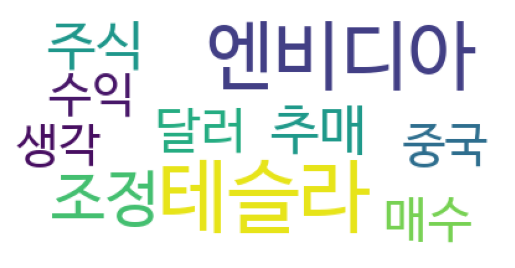

Counter({'ÌÖåÏä¨Îùº': 296, 'Ï°∞Ï†ï': 78, 'Îã¨Îü¨': 72, 'Ìä∏ÎüºÌîÑ': 67, 'Ï£ºÏãù': 63, 'ÏàòÏùµ': 50, 'ÏÇ¨Îûå': 49, 'Î®∏Ïä§ÌÅ¨': 49, 'Í≥†Ï†ê': 48, 'ÏãúÏûë': 47, 'Ï∂îÎß§': 47, 'ÏÉùÍ∞Å': 47, 'Îß§Ïàò': 43, 'ÌîÑÎ°ú': 42, 'Ï£ºÍ∞Ä': 41, 'Ìà¨Ïûê': 40, 'Ïò§Îäò': 38, 'Ïù¥Í±∞': 37, 'Ïñ¥Îîî': 37, 'ÏóîÎπÑÎîîÏïÑ': 35, 'Ïó∞ÏÑ§': 32, 'ÏòàÏÉÅ': 30, 'ÎßàÎÖÄ': 30, 'ÏÉÅÏäπ': 29, 'Î™©Ìëú': 28, 'ÏûêÏú®': 28, 'ÎØ∏Íµ≠': 28, 'Í∞ÄÏ¶à': 28, 'Ï£ºÌñâ': 27, 'Ï†ïÎèÑ': 25, 'Ïù¥Í≤å': 25, 'Ï¢ÖÎ™©': 24, 'Ïù¥Ï†Ñ': 23, 'Ïù¥Î≤à': 23, 'Í∞ÄÎä•': 23, 'Ïó∞Îßê': 23, 'ÏßÑÏûÖ': 23, 'ÌïòÎÇò': 23, 'Í¥ëÍ∏∞': 22, 'Í∞êÏÇ¨': 21, 'ÏãúÍ∞Ñ': 20, 'Í∞ÄÍ≤©': 20, 'Îß§ÎèÑ': 20, 'ÏßÄÍ∏à': 20, 'Î≥µÏÇ¨': 19, 'Ïù¥ÏÉÅ': 18, 'ÏÉÅÌñ•': 18, 'Ïö∞Î¶¨': 18, 'Ï†ÄÏ†ê': 17, 'ÎÇ¥ÎÖÑ': 16, 'Î∂ÑÌï†': 16, 'Ïù¥Í±¥': 16, 'Î™®Îç∏': 16, 'ÏΩîÏù∏': 16, 'ÌïòÎ£®': 15, 'ÎèåÌåå': 15, 'Ïñ∏Í∏â': 15, 'ÌèâÍ∞Ä': 15, 'ÏãúÎìú': 15, 'Îã§Ïùå': 15, 'Íµ¨Îß§': 14, 'Ïó¨Í∏∞': 14, 'Ï†ÑÍ∏∞Ï∞®': 14, 'ÏòàÏ†ï': 13, 'Í∏∞Í¥Ä': 13, 'Î∞úÌëú': 13, 'ÌÜ†Ïä§': 13, 'ÎèôÏïà': 13, 'Í∏∞Ìöå': 13, 'ÏµúÍ≥

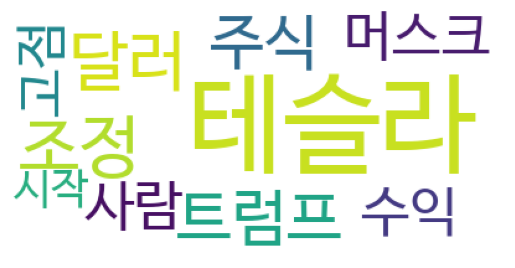

Counter({'ÌÖåÏä¨Îùº': 81, 'ÏóîÎπÑÎîîÏïÑ': 54, 'ÏÉùÍ∞Å': 41, 'Ï£ºÏãù': 36, 'ÏÇ¨Îûå': 34, 'Ïò§Îäò': 30, 'ÏàòÏùµ': 27, 'Ìà¨Ïûê': 26, 'Î®∏Ïä§ÌÅ¨': 26, 'Ïö∞Î¶¨': 24, 'Ïù¥Ï†Ñ': 24, 'ÏòàÏÉÅ': 22, 'Ï£ºÍ∞Ä': 22, 'ÏÉÅÏäπ': 22, 'Í∏∞ÏóÖ': 21, 'Ïù¥Î≤à': 21, 'ÌïòÎùΩ': 21, 'Îß§Ïàò': 21, 'Ïù¥ÏÉÅ': 20, 'Ï∂îÎß§': 20, 'Îã¨Îü¨': 19, 'Î≥∏Ïù∏': 18, 'Í∞úÎØ∏': 18, 'ÏãúÏûë': 18, 'ÏãúÍ∞Ñ': 18, 'Í∞ÄÎä•': 18, 'ÎØ∏Íµ≠': 18, 'Ïï†Ìîå': 18, 'ÎÇ¥ÎÖÑ': 17, 'ÏÇ∞ÌÉÄÎû†Î¶¨': 17, 'ÏÇ∞ÌÉÄ': 17, 'ÏòàÏ†ï': 15, 'ÏãúÏû•': 15, 'Îç∞Ïù¥ÌÑ∞': 15, 'Í∞úÎ∞ú': 15, 'Ï†ïÎèÑ': 15, 'Ìä∏ÎüºÌîÑ': 15, 'Í∏ÄÎ°úÎ≤å': 14, 'Ï†ÑÎßù': 14, 'Ï°∞Ï†ï': 14, 'Í≤ΩÏ†ú': 14, 'ÌôîÏöîÏùº': 14, 'Ïò§Ï†Ñ': 14, 'Í∞ÄÏ¶à': 14, 'Î∞±Ïù∏': 14, 'Ïò¨Ìï¥': 13, 'ÌîÑÎ°ú': 13, 'Ï∫òÎ¶∞Îçî': 12, 'Íµ≠Ï±Ñ': 12, 'ÏûÖÏ∞∞': 12, 'ÎπÑÏö©': 12, 'Ïñ¥Îîî': 12, 'ÏòµÏÖò': 12, 'Í∏àÏï°': 11, 'ÌõÑÌöå': 11, 'Î≥¥Ïú†': 11, 'Í∏∞Ìöå': 11, 'Ïù¥Ïû•': 11, 'Íµ¨Îß§': 11, 'ÏÇ¨Îûë': 10, 'Î©îÌÉÄ': 10, 'Ï¢ÖÎ™©': 10, 'Ïó∞Ï§Ä': 10, 'Í∏∞ÎåÄ': 10, 'ÎåÄÎπÑ': 10, 'Î≤†Ïù¥': 10, 'Ï°∞Ïä§': 10, 'ÏÜåÎìùÏÑ∏': 10, 'Ïù

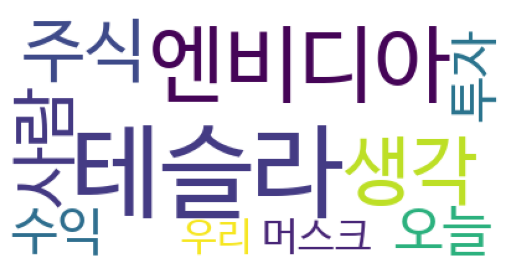

In [ ]:
for text in weekly_data['COMMENT'].values:
    nouns_text = mecab_inst.nouns(text[:60000])
    filtered_nouns = [noun for noun in nouns_text if len(noun) > 1]
    
    counter_text_splits = Counter(filtered_nouns)
    # 'ÏóîÎπÑ'ÏôÄ 'ÎπÑÎîîÏïÑ'Ïùò countÎ•º Ìï©Ï≥êÏÑú 'ÏóîÎπÑÎîîÏïÑ'Ïóê Ï†ÄÏû•
    if 'ÏóîÎπÑ' in counter_text_splits and 'ÎπÑÎîîÏïÑ' in counter_text_splits:
        combined_count = counter_text_splits['ÏóîÎπÑ'] + counter_text_splits['ÎπÑÎîîÏïÑ']
        counter_text_splits['ÏóîÎπÑÎîîÏïÑ'] = combined_count

        # 'ÏóîÎπÑ'ÏôÄ 'ÎπÑÎîîÏïÑ'Îäî Ïù¥Ï†ú ÏÇ≠Ï†ú (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
        del counter_text_splits['ÏóîÎπÑ']
        del counter_text_splits['ÎπÑÎîîÏïÑ']

    counter_dict = dict(counter_text_splits.most_common()[:10])

    wordcloud_instance = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
    wordcloud_instance.generate_from_frequencies(counter_dict) 

    plt.imshow(wordcloud_instance)
    plt.axis('off')
    plt.show()


In [87]:
def run_wordcloud(date_col_name, comment_col_name):
    df_data['WEEK'] = df_data[date_col_name].apply(get_week)
    weekly_data = df_data.groupby(['WEEK']).agg({comment_col_name: ' '.join}).reset_index()
    print(weekly_data)

    for text in weekly_data[comment_col_name].values:
        nouns_text = mecab_inst.nouns(text[:60000])
        filtered_nouns = [noun for noun in nouns_text if len(noun) > 1]

        counter_text_splits = Counter(filtered_nouns)
        # 'ÏóîÎπÑ'ÏôÄ 'ÎπÑÎîîÏïÑ'Ïùò countÎ•º Ìï©Ï≥êÏÑú 'ÏóîÎπÑÎîîÏïÑ'Ïóê Ï†ÄÏû•
        if 'ÏóîÎπÑ' in counter_text_splits and 'ÎπÑÎîîÏïÑ' in counter_text_splits:
            combined_count = counter_text_splits['ÏóîÎπÑ'] + counter_text_splits['ÎπÑÎîîÏïÑ']
            counter_text_splits['ÏóîÎπÑÎîîÏïÑ'] = combined_count

            # 'ÏóîÎπÑ'ÏôÄ 'ÎπÑÎîîÏïÑ'Îäî Ïù¥Ï†ú ÏÇ≠Ï†ú (ÏÑ†ÌÉù ÏÇ¨Ìï≠)
            del counter_text_splits['ÏóîÎπÑ']
            del counter_text_splits['ÎπÑÎîîÏïÑ']
        counter_dict = dict(counter_text_splits.most_common()[:10])

        wordcloud_instance = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
        wordcloud_instance.generate_from_frequencies(counter_dict) 

        plt.imshow(wordcloud_instance)
        plt.axis('off')
        plt.show()


   WEEK                                            COMMENT
0    47  Î®∏ÏÑ†ÏùºÏù¥Ïïº Î≠êÎÉê ÎÑà..Ïôú Ìù¨Îßù Í∞ñÍ≤åÌïòÎÉê Î™áÍ∞úÏõî Í∏∞Îã§Î¶¨Îã§Í∞Ä Ï°∞Í∏à Ïò¨ÎùºÏÑú Î∫èÎçîÎãà Ïûò Ïò¨...
1    49  Í≥ÑÏóÑ Ïã§Ìå® ÎÑàÎ¨¥ ÏïÑÏâ¨Ïö¥ ÏÇ¨Îûå Í∞úÏ∂î üëçüëçüëç 2024-12-04\n\nÏïàÎÖïÌïòÏÑ∏Ïöî Ï°¥Î≤ÑÍøÄ...
2    50  ÏπòÎß§ÏπòÎ£åÏïΩ Î¨∏Ïó¥Ïñ¥Ï£ºÏÑ∏Ïöî ÌòÑÍ∏∞Ï¶ùÎÇúÎã®ÎßêÏù¥ÏóêÏöî Ìïò.. 14Ìçº Ïò¨ÎûêÎäîÎç∞ 3ÎßåÏõêÎ∞ñÏóê Ïïà ÎÑ£Ïñ¥...
3    51  ÌÖåÏä¨Îùº Ìù•ÌñâÌïòÎ©¥ Íº≠ ÏûêÎπ†ÏßÄÎÑ§ Î∏åÎ°†Ï¶à Î±ÉÏßÄ„Ö£Îã® Îì£Î≥¥Îì§Ïù¥ Ï∞®Ìä∏Î∂ÑÏÑùÏùÑÏò¨Î¶∞Îã§?\nÍ∞ïÎ†•Ìïú Îß§...
4    52  Ïò§Îäò ÏßÑÏßú Í∂ÅÍ∏àÌïòÎÑ§ „Öã„Öã Ï†úÍ∞Ä Ïò¨Ìï¥ Ï¥ù 600 ÏàòÏùµÏùÑ ÎÉàÍ≥†\nÏßÄÍ∏à -330Ïù∏Îç∞ ÌåîÏïÑ...


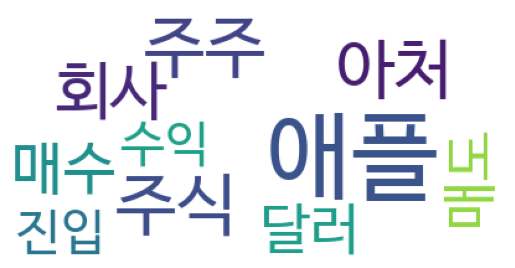

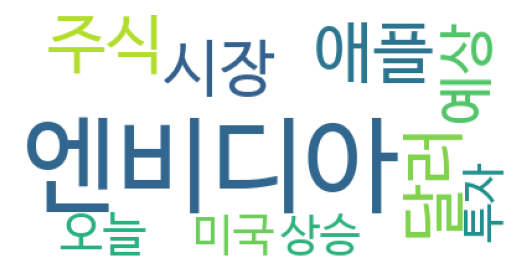

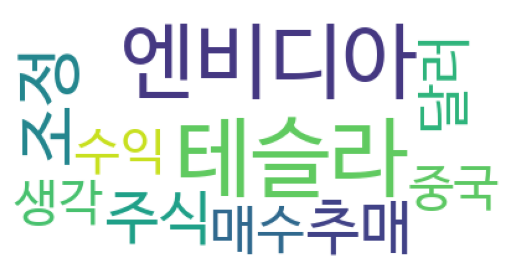

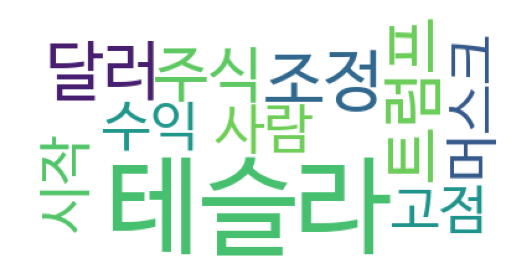

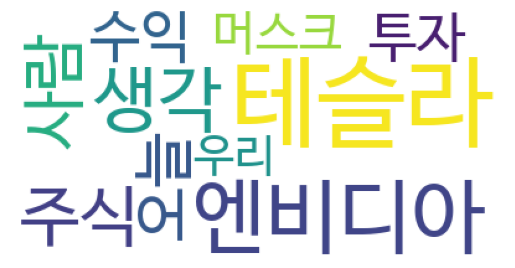

In [88]:
run_wordcloud('DATE','COMMENT')